# Directing Customers
@Author: Afshin (afshin.she@icloud.com)


In this project we are trying to create targeted ads; we try to show the ads in order to encourage our clients to buy our services. We are looking for the least attracted clients so maybe our ads could convince them to use the service.


The data set is about a mobile app. We have collected different parameters (age, enrollement date ...). Let's see how good our model will be!


I learnt how to this project thanks to an online course. (https://www.udemy.com/course/machine-learning-practical)

## EDA and Feature Engineering

### Importing libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser 
import time

### My CPU is arm-based and it generates a lot of useless warnings ###
import warnings
warnings.filterwarnings("ignore")

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

### Importing data set and EDA

In [2]:
# Importing data set
dataset = pd.read_csv("appdata10.csv")
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


#### EDA

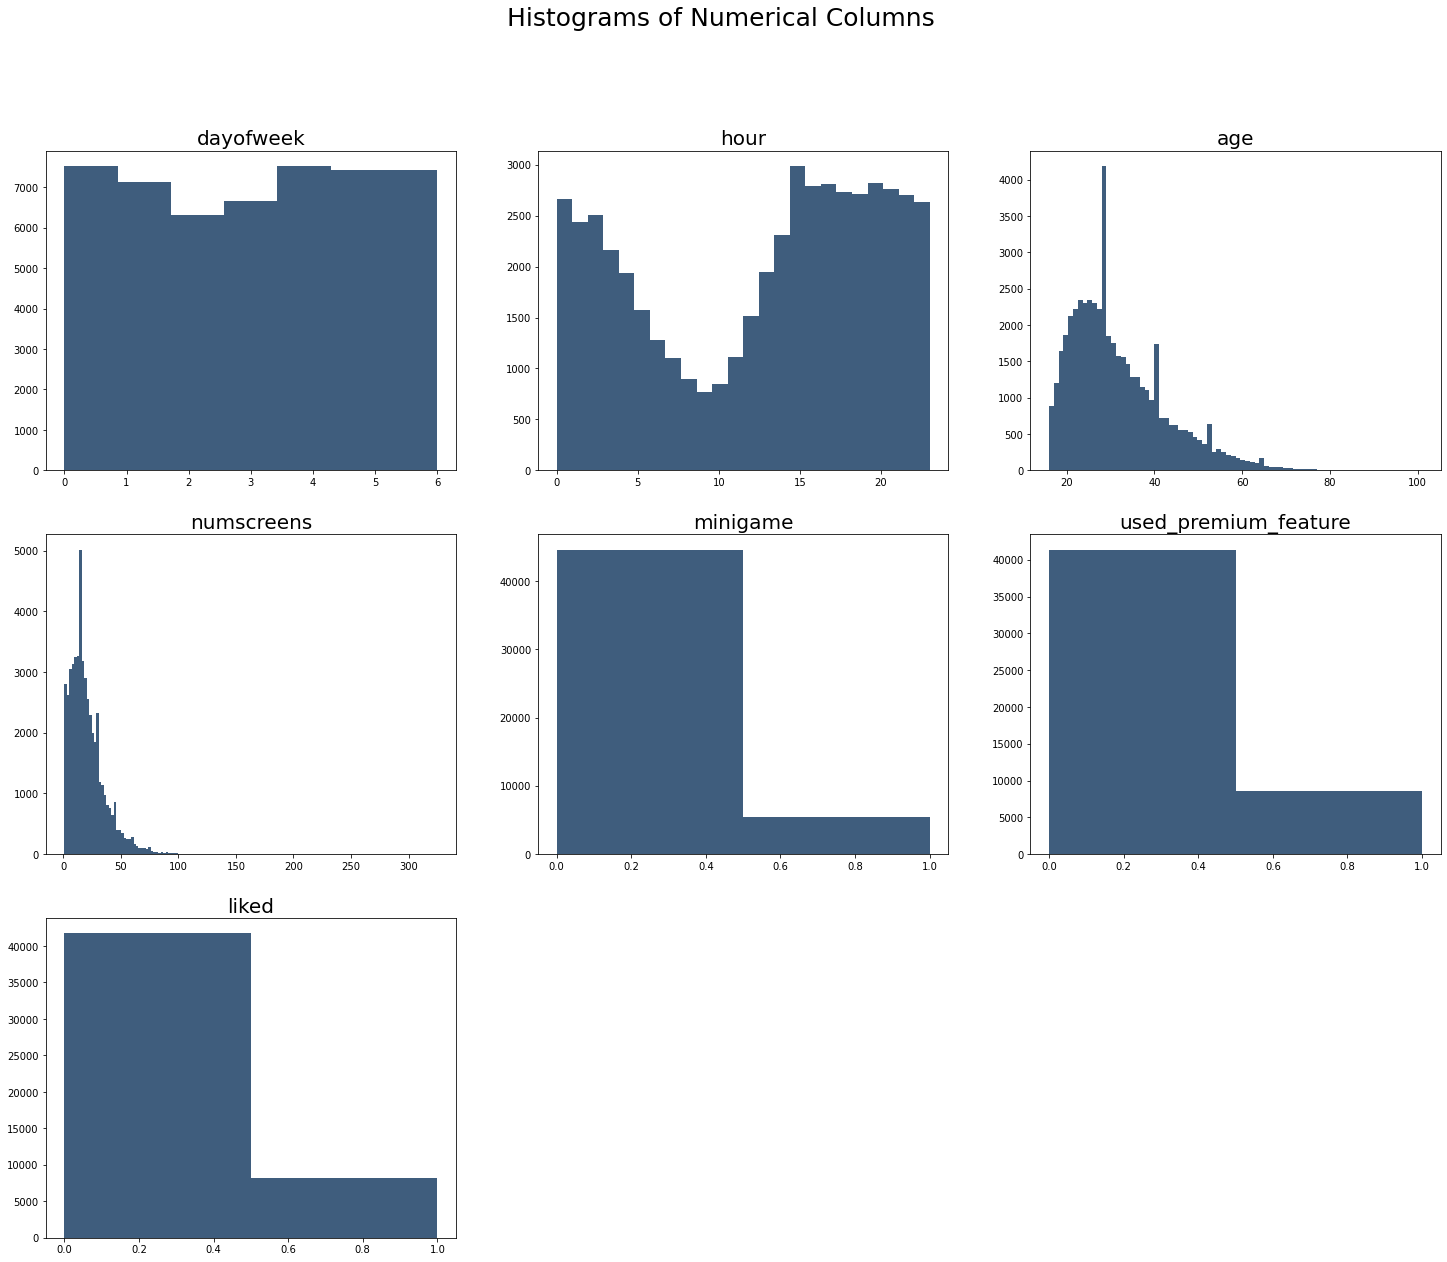

In [3]:
## Data cleaning: "hour" column is in string format, needs to be put in int format.
dataset["hour"] = dataset.hour.str.slice(1,3).astype(int)

dataset2 = dataset.copy().drop(columns = ["user", "screen_list", "enrolled_date", "first_open", "enrolled"])
dataset2.head()

## Histograms
plt.figure(figsize=(25, 20))
plt.suptitle("Histograms of Numerical Columns", 
             fontsize = 25)

for i in range(1, dataset2.shape[1]+1):
    plt.subplot(3, 3, i)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i - 1],
               fontsize = 20)
    
    vals = np.size(dataset2.iloc[:, i - 1].unique())
    plt.hist(dataset2.iloc[:, i-1],
             bins = vals,
             color = "#3F5D7D")

<AxesSubplot:title={'center':'Correlation with Response Variable'}>

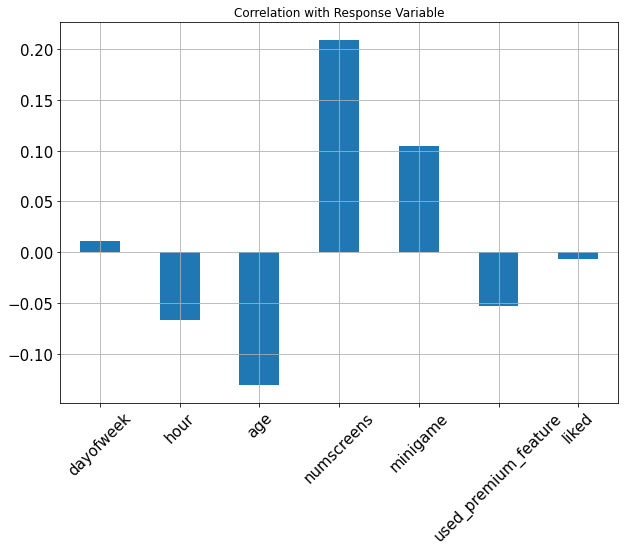

In [4]:
# Correlation with response
dataset2.corrwith(dataset.enrolled).plot.bar(figsize = (10, 7),
                                             title = "Correlation with Response Variable",
                                             fontsize = 15, 
                                             rot = 45,
                                             grid = True)

Text(0.5, 0.98, 'Correlation Matrix')

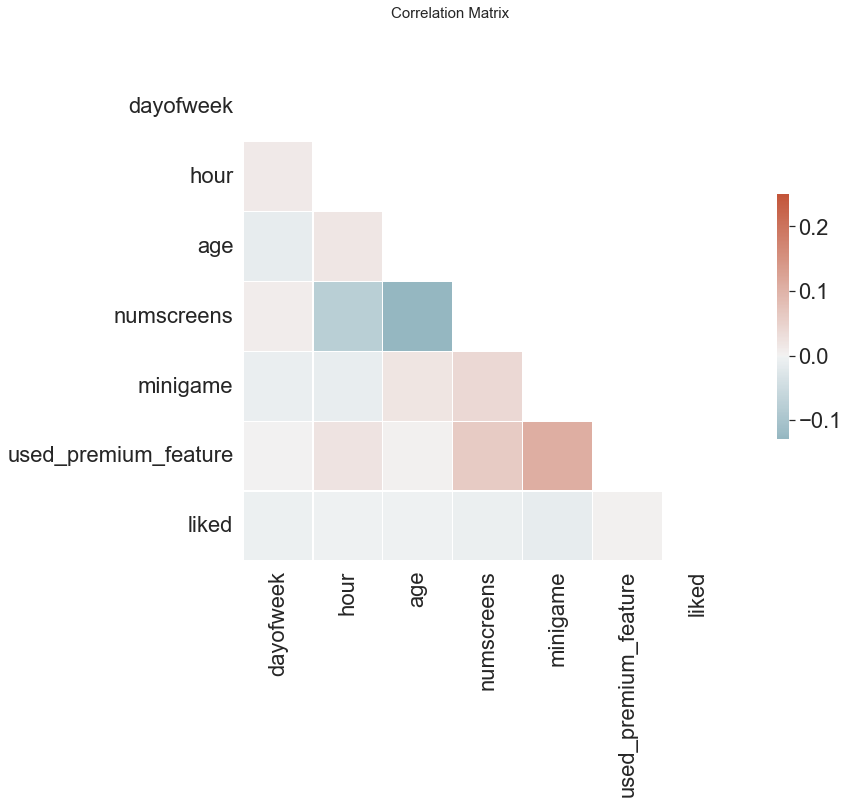

In [5]:
# Correlation matrice
sns.set(style = "white", font_scale = 2)

# Compute the correlation matrice
corr = dataset2.corr()

# Generate a mask for the upper traingle
mask = np.zeros_like(corr,
                     dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f = plt.figure(figsize = (16, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20,
                             as_cmap = True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
          mask = mask,
          cmap = cmap,
          vmax = 0.25,
          center = 0,
          square = True,
          linewidths = 0.5,
          cbar_kws = {"shrink": 0.5})
f.suptitle("Correlation Matrix", fontsize = 15)


## Feature engineering 

#### Feature engineering: Response variable, enrolled

We need to find a reasoanble period during which we will test our ML model.

In [6]:
print(dataset.dtypes, "\n\n")

# Changing first_open and enrolled_date from str into datetime64
dataset["first_open"] = [parser.parse(raw_data) for raw_data in dataset["first_open"]]
dataset["enrolled_date"] = [parser.parse(raw_data) if isinstance(raw_data, str) else raw_data for raw_data in dataset["enrolled_date"]]

print("\n\n",dataset[["first_open", "enrolled_date"]])

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object 




                    first_open           enrolled_date
0     2012-12-27 02:14:51.273                     NaT
1     2012-12-02 01:16:00.905                     NaT
2     2013-03-19 19:19:09.157                     NaT
3     2013-07-05 16:08:46.354 2013-07-05 16:11:49.513
4     2013-02-26 18:50:48.661 2013-02-26 18:56:37.841
...                       ...                     ...
49995 2013-05-09 13:46:17.871 2013-05-09 13:47:52.875
49996 2013-04-09 00:05:17.823                     NaT
49997 2013-02-20 22:41:51.165                     NaT
49998 2013-04-28 12:33:04.288 2013-04-28 12:35:38.709
49999 2012-12-

In [7]:
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

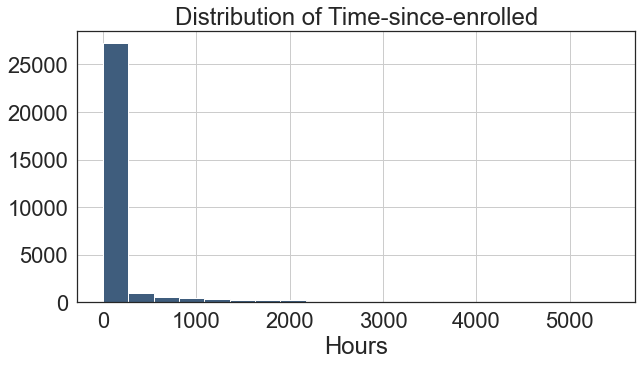

In [8]:
# enrolled_date - first_open (in hours) 
dataset["difference"] = (dataset.enrolled_date - dataset.first_open).astype("timedelta64[h]") 

# Creating histogram of difference
plt.figure(figsize = (10, 5))
plt.hist(dataset["difference"].dropna(),
         color = "#3F5D7D",
         bins = 20)

plt.title("Distribution of Time-since-enrolled")
plt.xlabel("Hours")
plt.grid()
plt.show()

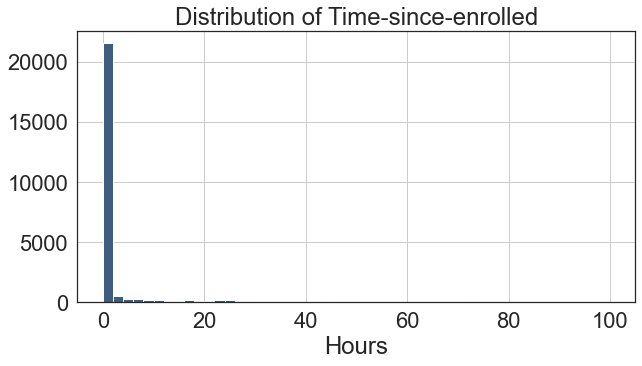

In [9]:
# We are creating a more detialed histogram since in the last one was right-skewed: range = (0, 100)
# enrolled_date - first_open (in hours) 
dataset["difference"] = (dataset.enrolled_date - dataset.first_open).astype("timedelta64[h]") 

# Creating histogram of difference
plt.figure(figsize = (10, 5))
plt.hist(dataset["difference"].dropna(),
         range = (0, 100),
         color = "#3F5D7D",
         bins = 50)

plt.title("Distribution of Time-since-enrolled")
plt.xlabel("Hours")
plt.grid()
plt.show()

In [10]:
# We are only considering users for whom difference < 48 hours (they enrolled at most 48 hours after first open)
dataset.loc[dataset.difference > 48, "enrolled"] = 0
dataset = dataset.drop(columns = ["difference", "enrolled_date", "first_open"])

#### Feature engineering: Screens

In [11]:
## Formatting the screen_list Field

# Load Top Screens
top_screens = pd.read_csv('top_screens.csv').top_screens.values

dataset["screen_list"] = dataset.screen_list.astype(str) + ","

for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset["screen_list"] = dataset.screen_list.str.replace(sc+ ",","")
    
dataset["Other"] = dataset.screen_list.str.count(",")
dataset = dataset.drop(columns = ["screen_list"])

# Funnels

savings_screens = ["Saving1",
                   "Saving2",
                   "Saving2Amount",
                   "Saving4",
                   "Saving5",
                   "Saving6",
                   "Saving7",
                   "Saving8",
                   "Saving9",
                   "Saving10"]
dataset["SavingsCount"] = dataset[savings_screens].sum(axis = 1)
dataset = dataset.drop(columns = savings_screens)

cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
dataset["CMCount"] = dataset[cm_screens].sum(axis=1)
dataset = dataset.drop(columns=cm_screens)

cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
dataset["CCCount"] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns=cc_screens)

loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
dataset["LoansCount"] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns=loan_screens)

#### Saving Results ####
dataset.head()
dataset.describe()
dataset.columns

dataset.to_csv('new_appdata10.csv', index = False)
    

 ##Machine Learning Model

In [14]:
dataset = pd.read_csv("new_appdata10.csv")

# Data preprocessing
y = dataset["enrolled"]
X = dataset.drop(columns = "enrolled") 

# Spitting dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state = 0 )

# Getting rid of the user in training/test sets
train_user = X_train["user"]
X_train = X_train.drop(columns = "user")

test_user = X_test["user"]
X_test = X_test.drop(columns = "user")

# Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

X_train2 = pd.DataFrame(sc_X.fit_transform(X_train)) 
X_test2 = pd.DataFrame(sc_X.transform(X_test))

X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

X_train = X_train2
X_test = X_test2

# Machine Learning Model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = "l1", solver='liblinear')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Model evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)

print("Confusion Matrix: \n\n",cm, "\n")
print("Accuracy: \n\n",acc_score)

Confusion Matrix: 

 [[3886 1186]
 [1133 3795]] 

Accuracy: 

 0.7681


In [13]:
### This part needs to be debugged ###


# df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
# plt.figure(figsize = (10, 7))
# sns.set(font_scale = 1.4)
# sns.heatmap(df_cm,
#             annot = True,
#             fmt = "g")
# print("Test data accuracy: %0.4f" %accuracy_score(y_test, y_pred))